In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
pd.set_option("display.max_columns",None)


In [3]:
sns.set_style("whitegrid")

In [4]:
df=pd.read_csv("german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.shape

(1000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

In [10]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df=df.dropna().reset_index(drop=True)

In [13]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [15]:
df.drop(columns='Unnamed: 0',inplace=True)

In [16]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


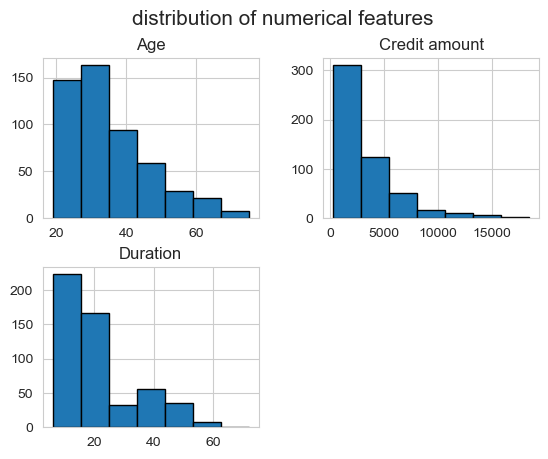

In [17]:
df[['Age','Credit amount','Duration']].hist(bins=7,edgecolor='black')
plt.suptitle('distribution of numerical features',fontsize=15)
plt.show()

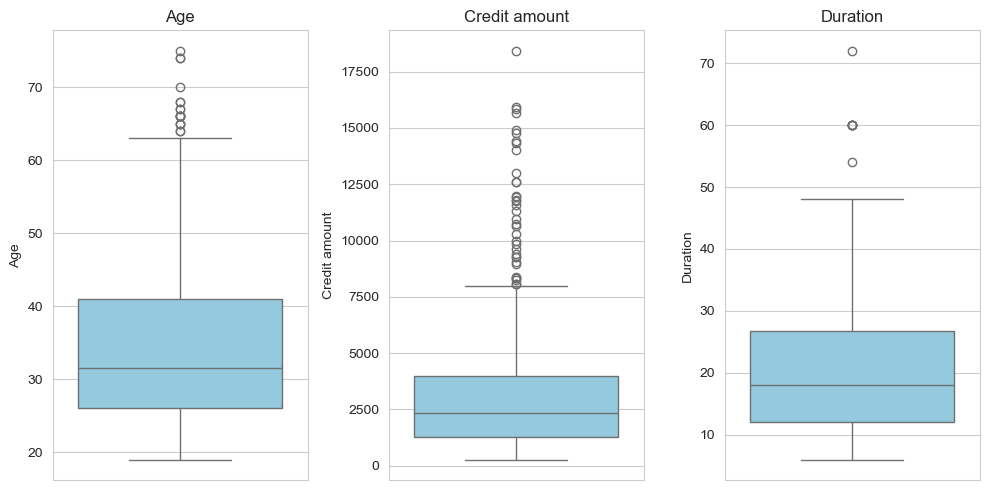

In [18]:
plt.figure(figsize=(10,5))
for i , col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],color='skyblue')
    plt.title(col)
plt.tight_layout()

In [19]:
df.query("Duration>=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [20]:
categorical_cols=['Sex','Job','Housing','Saving accounts','Checking account','Purpose']

C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\1887948508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2',order=df[col].value_counts().index)
C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\1887948508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2',order=df[col].value_counts().index)
C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\1887948508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2',order=df[col].value_counts().index)
C:\User

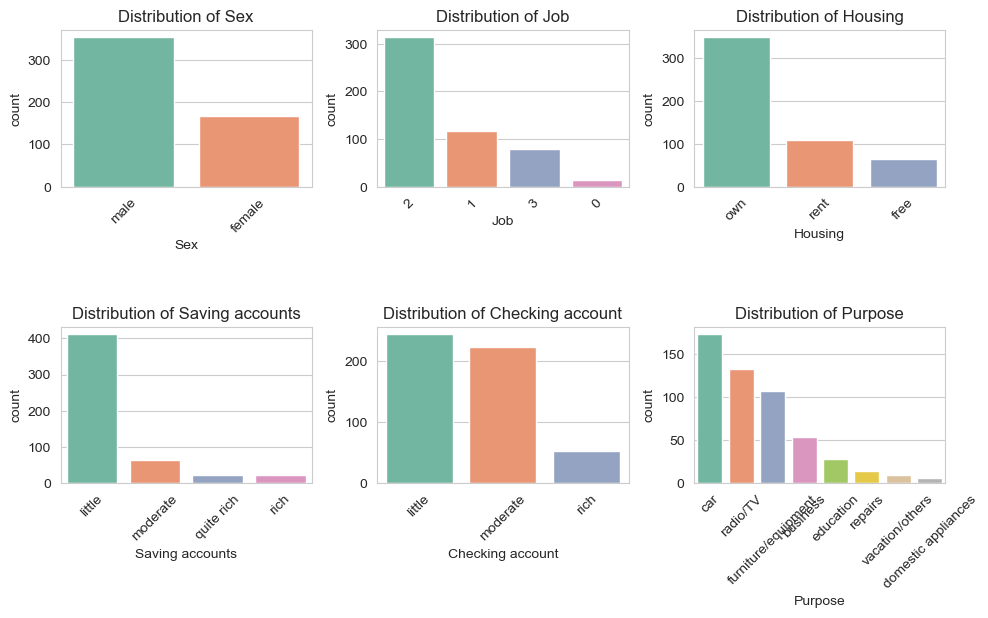

In [21]:
plt.figure(figsize=(10,8))
for i ,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette='Set2',order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
corr=df[['Age','Job','Credit amount','Duration']].corr()

In [23]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

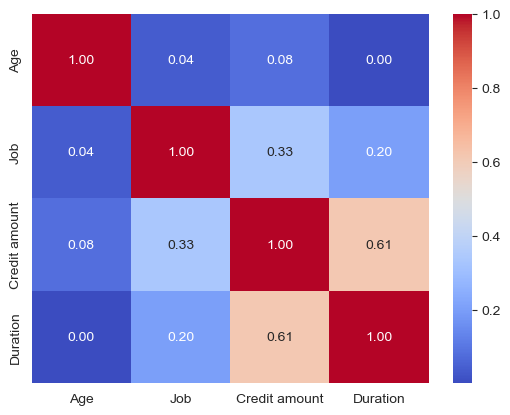

In [24]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

In [25]:
df.groupby('Job')['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [26]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [27]:
pd.pivot_table(df,values='Credit amount',index='Housing',columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


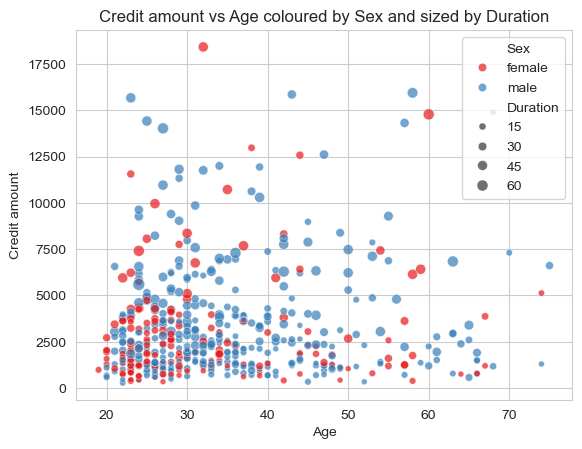

In [28]:
sns.scatterplot(data=df,x='Age',y='Credit amount',hue='Sex',size='Duration',alpha=0.7,palette='Set1')
plt.title("Credit amount vs Age coloured by Sex and sized by Duration")
plt.show()

C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\3260259298.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Saving accounts',y='Credit amount',palette='Pastel1')


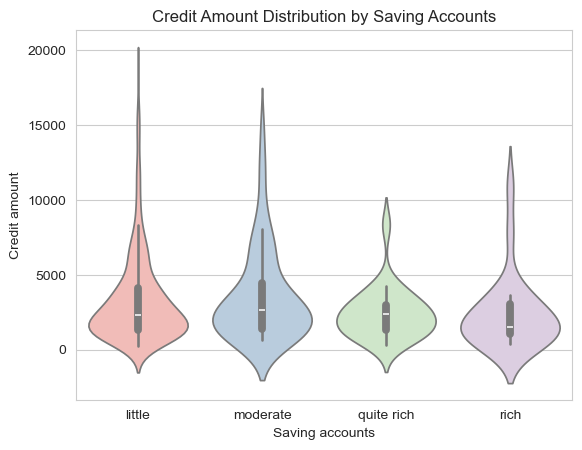

In [29]:
sns.violinplot(data=df,x='Saving accounts',y='Credit amount',palette='Pastel1')
plt.title('Credit Amount Distribution by Saving Accounts')
plt.show()

In [30]:
df['Risk'].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\1621174232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Risk',y=col,palette='Pastel2')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\1621174232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Risk',y=col,palette='Pastel2')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_20272\1621174232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Risk',y=col,palette='Pastel2')


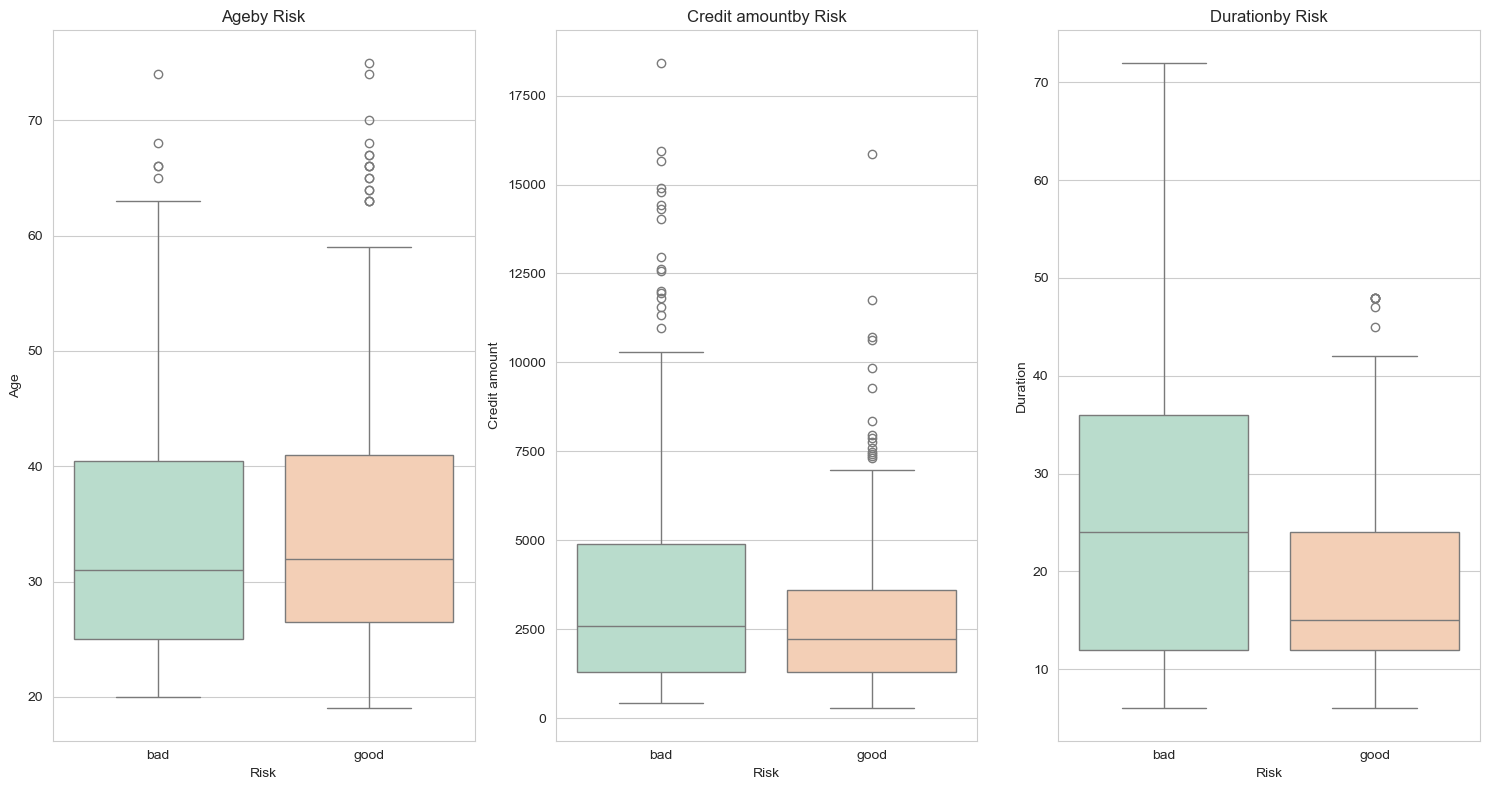

In [31]:
plt.figure(figsize=(15,8))
for i,col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x='Risk',y=col,palette='Pastel2')
    plt.title(f"{col}by Risk")
plt.tight_layout()
plt.show()

In [32]:
df.groupby('Risk')[['Age','Credit amount','Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


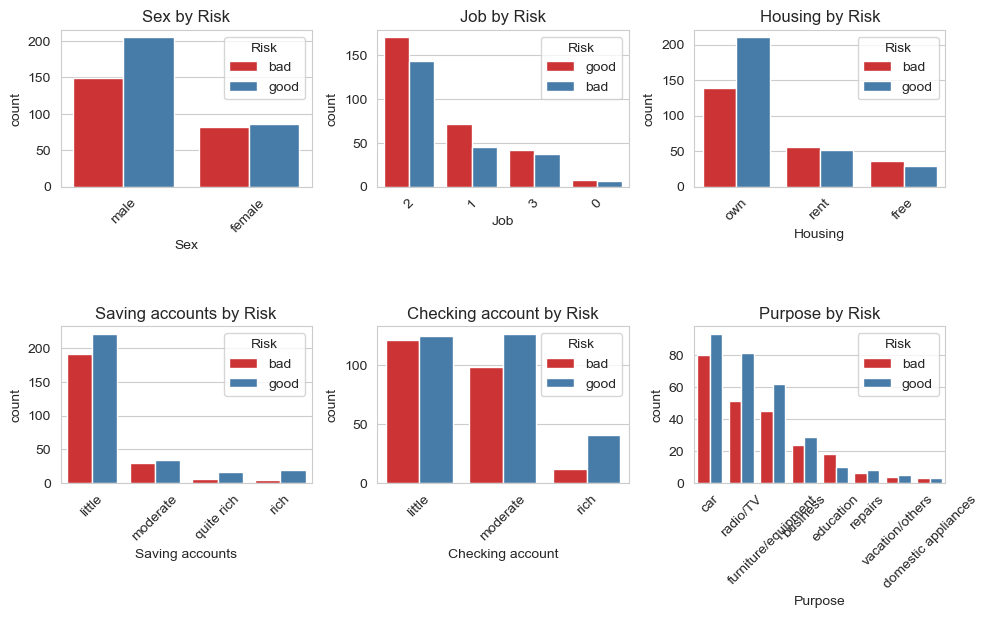

In [33]:
plt.figure(figsize=(10,8))
for i , col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue='Risk',palette='Set1',order=df[col].value_counts().index)
    plt.title(f'{col} by Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
features = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration',]

In [35]:
target='Risk'

In [36]:
df_model=df[features + [target]].copy()

In [37]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [38]:
cat_cols =df_model.select_dtypes(include='object').columns.drop('Risk')

In [39]:
le_dict={}

In [40]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [41]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")


In [42]:
le_target = LabelEncoder()

In [43]:
target

'Risk'

In [44]:
df_model[target]=le_target.fit_transform(df_model[target])

In [45]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [46]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [47]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X= df_model.drop(target, axis=1)

In [50]:
y=df_model[target]

In [51]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [52]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int32

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [54]:
X_train.shape

(417, 8)

In [55]:
X_train.shape

(417, 8)

In [56]:
import sys
!{sys.executable} -m pip install --upgrade pip wheel
!{sys.executable} -m pip install xgboost

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.43.0
    Uninstalling wheel-0.43.0:
      Successfully uninstalled wheel-0.43.0
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)


In [57]:
!{sys.executable} -m pip install --upgrade pip wheel
!{sys.executable} -m pip install xgboos

ERROR: Could not find a version that satisfies the requirement xgboos (from versions: none)
ERROR: No matching distribution found for xgboos


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [60]:
def train_model(model1,param_grid,X_train,y_train,X_test,y_test):
    grid = GridSearchCV(model1, param_grid, cv=5,scoring='accuracy',n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [62]:
dt= DecisionTreeClassifier(random_state=1,class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10 ,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [65]:
print("Decision Tree Accuracy",acc_dt)

Decision Tree Accuracy 0.580952380952381


In [66]:
print("Best parameters for Decision Tree:", params_dt)

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [68]:
rf= RandomForestClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [69]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [70]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [71]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.6190476190476191


In [72]:
print("Best parameters for Random Forest:", params_rf)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [73]:
et= ExtraTreesClassifier(random_state=1,class_weight='balanced',n_jobs=-1)

In [81]:
et_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [82]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [83]:
print("Extra Tree accuracy", acc_et)

Extra Tree accuracy 0.6476190476190476


In [84]:
print("Best parameters for Extra Trees:", params_et)

Best parameters for Extra Trees: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [86]:
xgb=XGBClassifier(random_state=1,scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),use_label_encoder=False,eval_metric='logloss')

In [87]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

In [88]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

c:\Users\Rishi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [89]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.6761904761904762


In [90]:
print("Best parameters for XGB:",params_xgb)

Best parameters for XGB: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [91]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [92]:
joblib.dump(best_et, "best_extra_trees_model.pkl")

['best_extra_trees_model.pkl']

In [94]:
df['Saving accounts'].unique()

array(['little', 'moderate', 'quite rich', 'rich'], dtype=object)

In [97]:
df['Credit amount'].unique()

array([ 5951,  7882,  4870,  6948,  5234,  1295,  4308,  1567,  1199,
        1403,  1282, 12579,  2647,  2241,  1804,  1374,   409,  2415,
        6836,  1913,  4020,  5866,  1474,  4746,  2100,  1225,   458,
        1158,  6204,  6187,  6143,  1352,  5965,  2225,  1961,  6229,
        1391,  1953, 14421,  1007,  1164,  5954,  1526,  3965,  4771,
        3832,  1755,  2315, 12612,  2249,  1108,  1409,  1318, 15945,
        2622,  2337,  2323,  1919, 11938,  6078,  1410,  1449,   392,
        6260,  1680,  4281,  2366,  1835,   781,  2121,   701,   639,
        1860,  3499,  6887,   766,  1881,   709,  4795,  3416,  2462,
        3566,   860,  5371,  5848,  7758,  6967,  1288,   339,  3512,
        7308,  1131,  1577,  1935,   950,  2064,  1414,  3414,  2577,
         338,   571,  4455,   884,  5129,  1175,   674,  3244,  3844,
        3915,  3031,  1501,   951,  4297,  1168,   902, 10623,  1424,
        6568,  5293,  1908,  3104,  3913,  3021,   625, 10961,  7865,
        3149,  4210,